In [1]:
# (0) セットアップ

import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import erf
import matplotlib.pyplot as plt

def error_rate(x, a, b):
    return (1 - erf((x-a) / b * np.sqrt(2))) / 2

def calc_sd(x_data, y_data):
    initial_params = [-5, 1.0]
    params, covariance = curve_fit(error_rate, x_data, y_data, p0=initial_params)

    # フィッティングされた曲線を描画
    x_fit = np.linspace(min(x_data), max(x_data), 100)
    y_fit = error_rate(x_fit, *params)

    plt.scatter(x_data, y_data, label='Data')
    plt.plot(x_fit, y_fit, label='Fitted Curve', color='red')
    plt.legend()

    plt.rcParams['font.family'] = ''
    # plt.title('データ入力時刻とクロック入力時刻の差とDFFのエラー率の関係')
    # plt.xlabel('データ入力時刻 - クロック入力時刻')
    # plt.ylabel('エラー確率')
    plt.xlabel('clock - data (ps)')
    plt.ylabel('Error Rate')

    # x軸の目盛りを整数値にする
    x_ticks = np.arange(int(min(x_data)), int(max(x_data)) + 1, 2)  # ステップサイズを2に設定
    plt.xticks(x_ticks)

    plt.show()
    print("Fitted Parameters:", params)
    return params

    
def calc_sd_hold(x_data,y_data):
    # フィッティングの実行
    params, covariance = curve_fit(error_rate, x_data, y_data)

    # フィッティングされた曲線を描画
    x_fit = np.linspace(min(x_data), max(x_data), 100)
    y_fit = error_rate(x_fit, *params)

    plt.scatter(x_data, y_data, label='Data')
    plt.plot(x_fit, y_fit, label='Fitted Curve', color='red')
    plt.legend()
    plt.xscale('linear')
    plt.yscale('log', base=10)

    plt.rcParams['font.family'] = ''
    #plt.title(title)
    # plt.title('データ入力時刻とクロック入力時刻の差とDFFのエラー率の関係')
    # plt.xlabel('データ入力時刻 - クロック入力時刻')
    # plt.ylabel('エラー率')
    plt.xlabel('data - clock (ps)')
    plt.ylabel('Error Rate')

    # x軸の目盛りを整数値にする
    x_ticks = np.arange(int(min(x_data)), int(max(x_data)) + 1, 2)  # ステップサイズを2に設定
    plt.xticks(x_ticks)

    plt.show()

    # フィッティングされたパラメータを表示
    print("Fitted Parameters:", params)
    return params

    
def curve_point_search(x_data,y_data):
    data_index = 0
    for i,data  in enumerate(x_data):
        if i < len(x_data):
            if 0 < float(data) and 1.0 > float(data) and 0 < float(x_data[i]) and 1.0 > float(x_data[i]):
                data_index = i
                break
    return x_data[data_index:data_index+30]

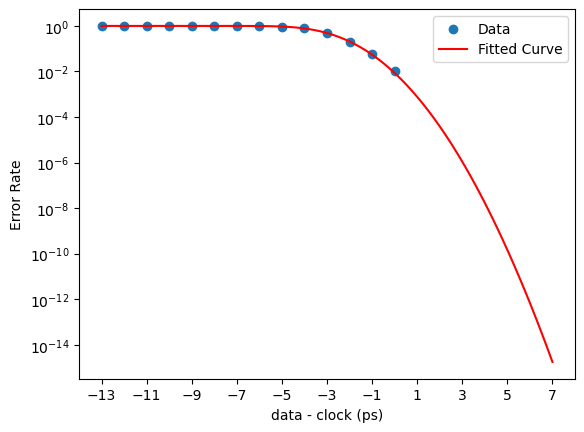

Fitted Parameters: [-3.03997435  2.55159732]


In [4]:
# (1) ホールドタイムの計算

# パラメータの指定
lic = 192.5
ic = 50

# ファイル名の指定
file = "timing-retest2/hold_"+ str(lic) + "_" +str(ic)+".csv"
# log_file = "time_param.csv"

df = pd.read_csv(file,names=["time","error_count","clock1_rate","clock2_rate","clock3_rate"])
x_data = df["time"]-300
y_data = 1-df["clock2_rate"]

# カーブフィッティング
params = calc_sd_hold(x_data,y_data)

#　ファイルに書き込み
#pd.DataFrame([{'lic':lic,'ic':ic,'mean':round(params[0],3),'std':round(params[1],3)}]).to_csv(log_file,mode="a",header=False,index=False)



findfont: Font family [] not found. Falling back to DejaVu Sans.


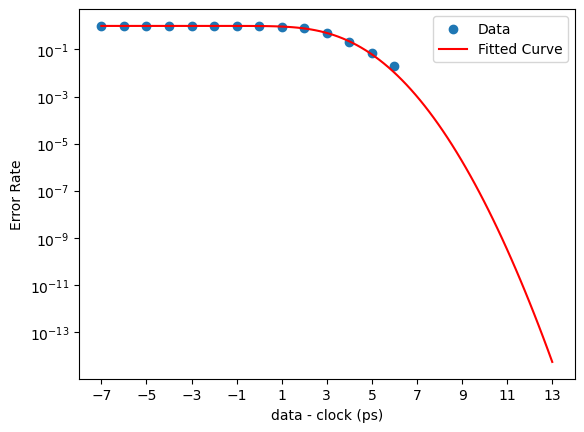

Fitted Parameters: [3.00888808 2.58562578]


In [5]:
# (2) セットアップタイムの計算

# パラメータの指定
lic = 192.5
ic = 50

# ファイル名の指定
file = "timing-retest2/setup_"+ str(lic) + "_" +str(ic)+".csv"
# log_file = "timing/setup_time.csv"

df = pd.read_csv(file,names=["time","error_count","clock1_rate","clock2_rate","clock3_rate"])
x_data = 400-df["time"]
y_data = 1-df["clock2_rate"]

# カーブフィッティング
params = calc_sd_hold(x_data,y_data)
#　ファイルに書き込み
#pd.DataFrame([{'lic':lic,'ic':ic,'mean':round(params[0],3),'std':round(params[1],3)}]).to_csv(log_file,mode="a",header=False,index=False)



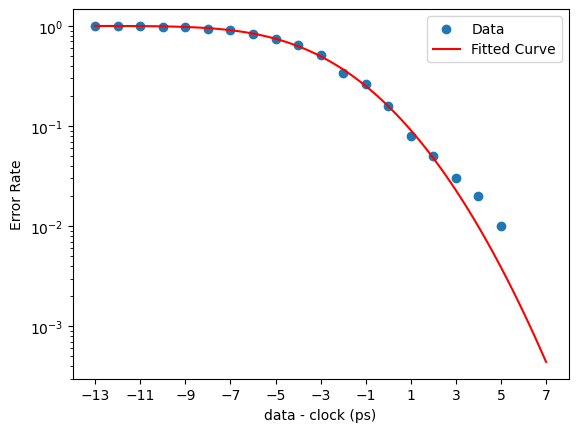

Fitted Parameters: [-3.02205544  6.02643816]


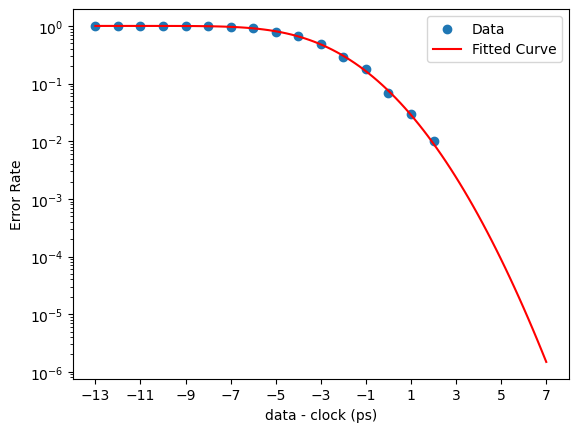

Fitted Parameters: [-3.11833673  4.33086036]


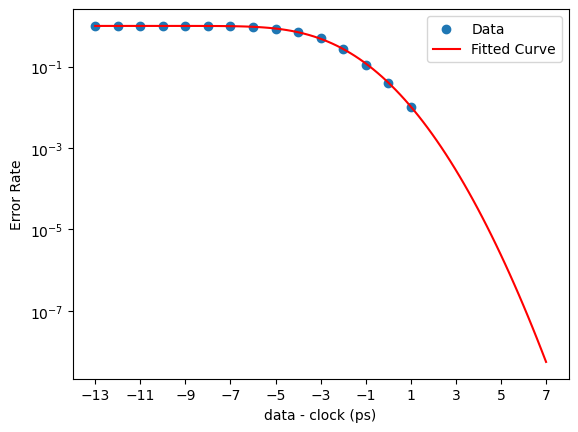

Fitted Parameters: [-3.07379654  3.52725459]


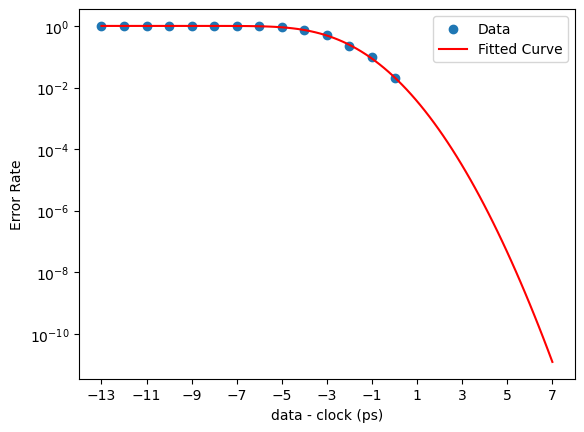

Fitted Parameters: [-3.05011796  3.01106954]


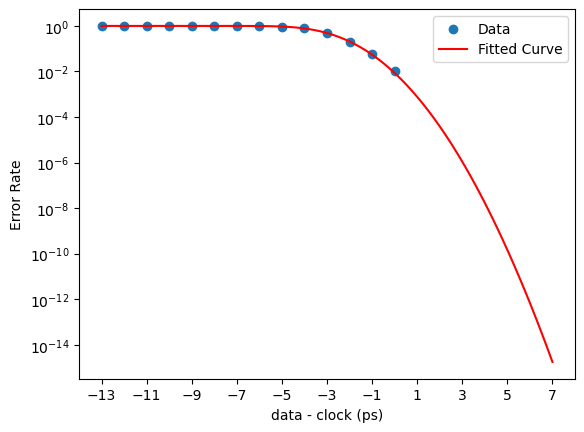

Fitted Parameters: [-3.03997435  2.55159732]


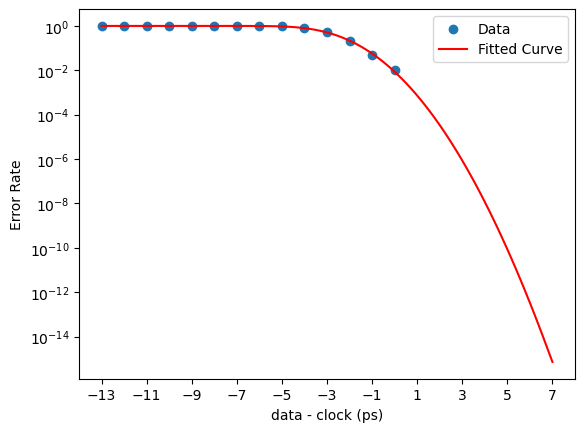

Fitted Parameters: [-2.97559141  2.49821142]


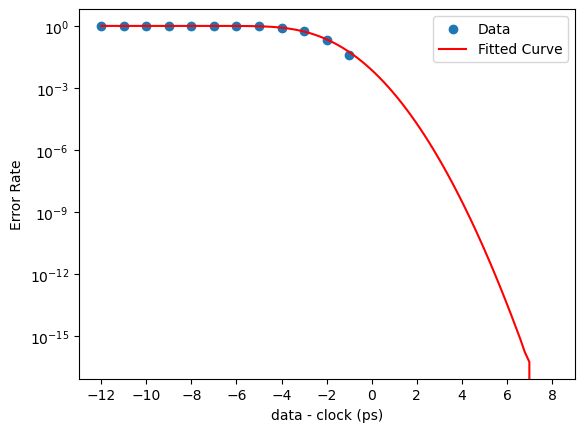

Fitted Parameters: [-2.90276064  2.377162  ]


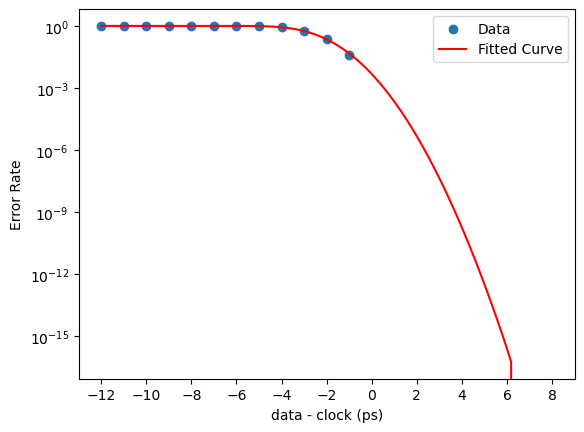

Fitted Parameters: [-2.82614797  2.17535613]


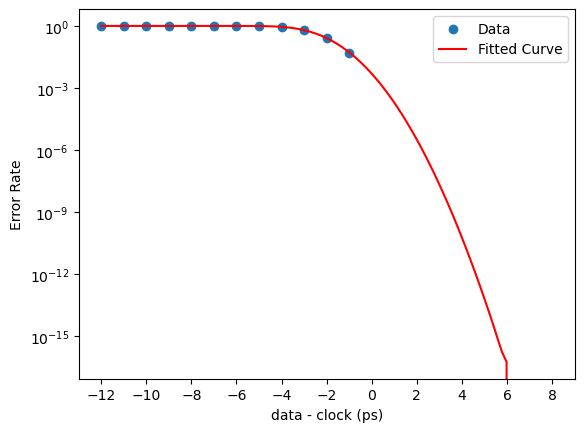

Fitted Parameters: [-2.67699388  2.07132118]


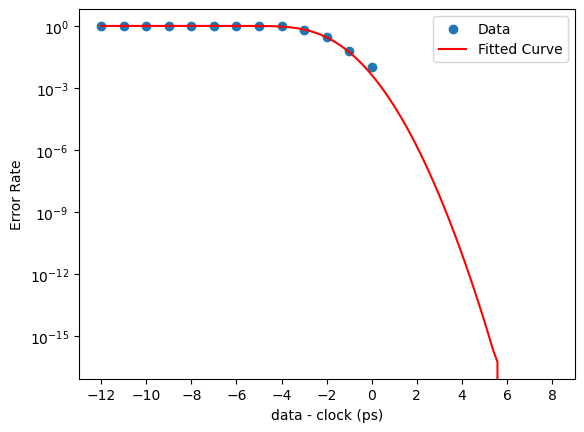

Fitted Parameters: [-2.57403852  1.95730443]


In [6]:
# (3))複数の臨界電流値での算出
log_file = "timing-retest2/hold_time.csv"
lic = 192.5

for ic in range(10,110,10):
    file = "timing-retest2/hold_"+str(lic)+"_"+str(ic)+".csv"
    df = pd.read_csv(file,names=["time","error_count","clock1_rate","clock2_rate","clock3_rate"])
    x_data = df["time"]-300
    y_data = 1-df["clock2_rate"]
    params = calc_sd_hold(x_data,y_data)
    pd.DataFrame([{'lic':lic,'ic':ic,'mean':round(params[0],3),'std':round(params[1],3)}]).to_csv(log_file,mode="a",header=False,index=False)



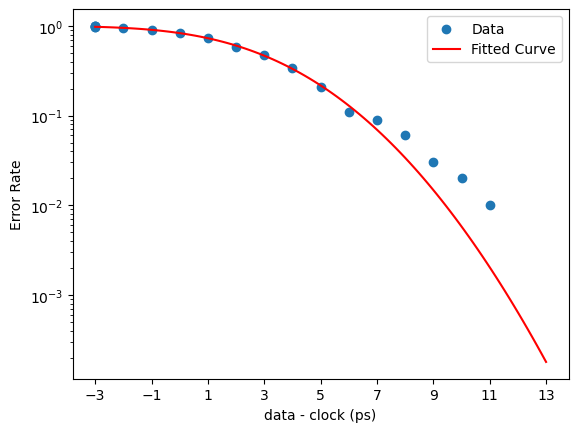

Fitted Parameters: [2.75363891 5.74153971]


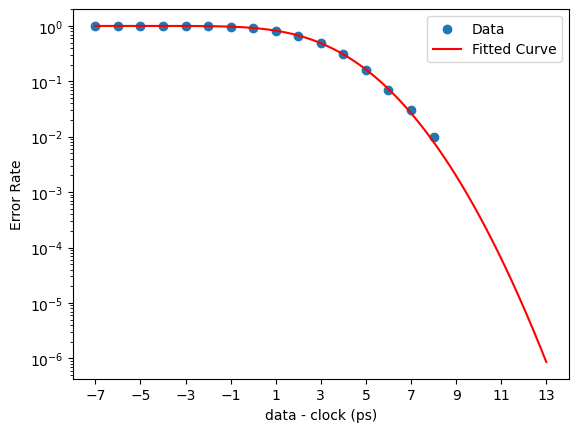

Fitted Parameters: [2.93747688 4.20716487]


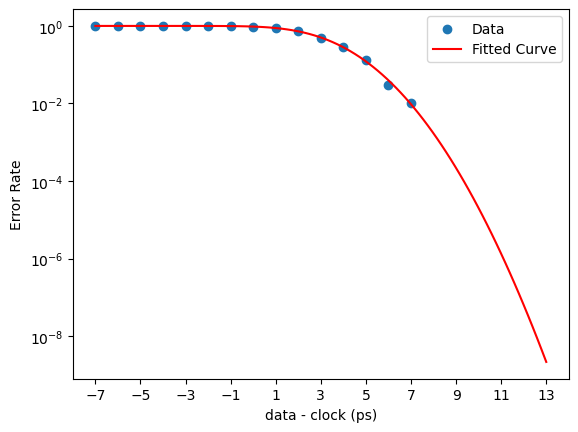

Fitted Parameters: [3.01599622 3.40155992]


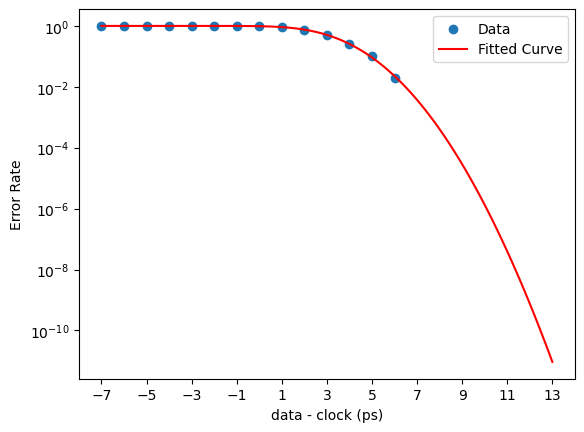

Fitted Parameters: [3.02518612 2.96999535]


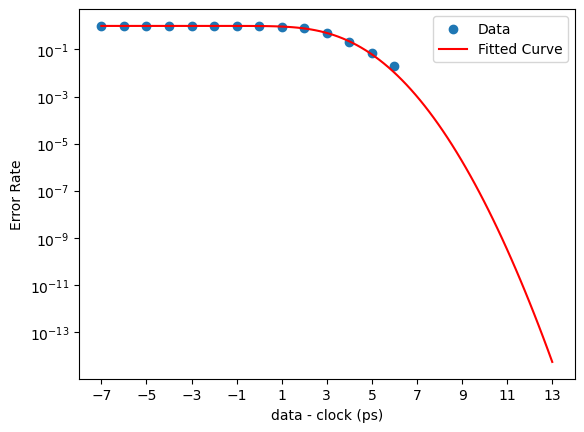

Fitted Parameters: [3.00888808 2.58562578]


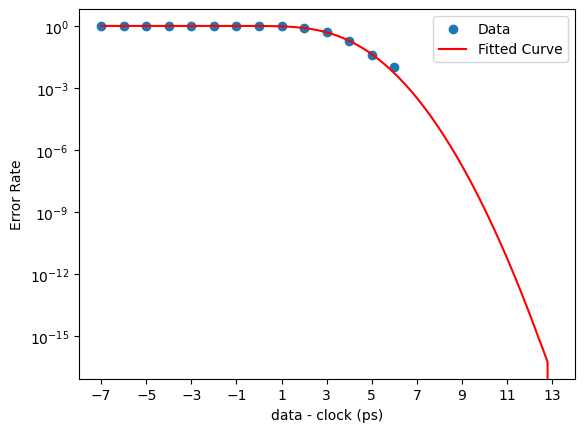

Fitted Parameters: [2.96322229 2.36912107]


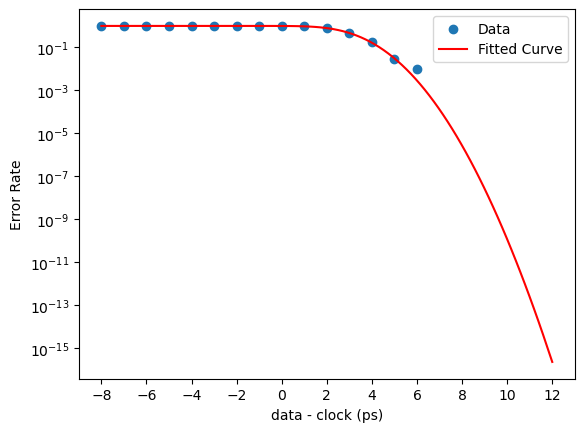

Fitted Parameters: [2.90958182 2.23703071]


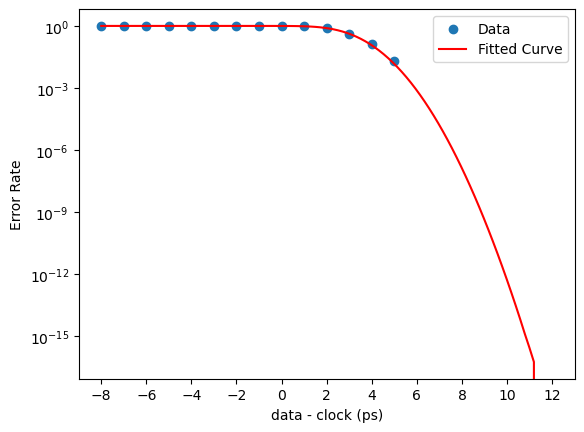

Fitted Parameters: [2.79073588 2.0223999 ]


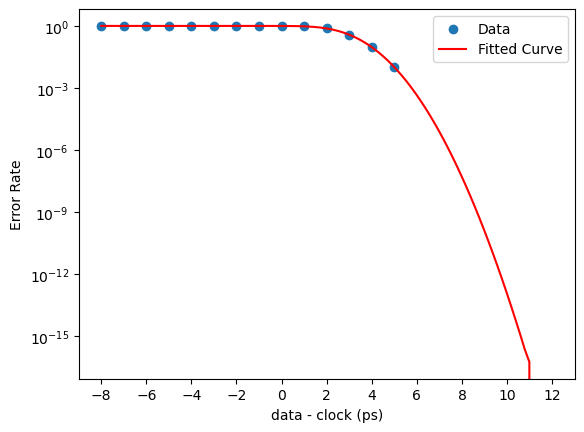

Fitted Parameters: [2.68601959 1.99405508]


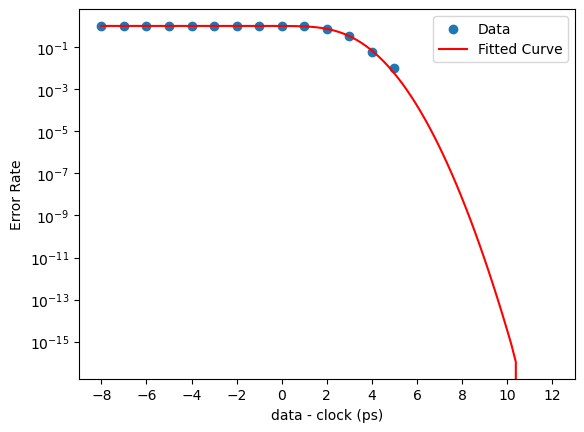

Fitted Parameters: [2.5745251 1.9085601]


In [7]:
log_file = "timing-retest2/setup_time.csv"
lic = 192.5

for ic in range(10,110,10):
    file = "timing-retest2/setup_"+str(lic)+"_"+str(ic)+".csv"
    df = pd.read_csv(file,names=["time","error_count","clock1_rate","clock2_rate","clock3_rate"])
    x_data = 400-df["time"]
    y_data = 1-df["clock2_rate"]
    params = calc_sd_hold(x_data,y_data)
    pd.DataFrame([{'lic':lic,'ic':ic,'mean':round(params[0],3),'std':round(params[1],3)}]).to_csv(log_file,mode="a",header=False,index=False)

